In [1]:
from torch import nn

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax= nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [3]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Concise Representation

In [4]:
import torch.nn.functional as F

In [5]:
class ConNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

More Concise Representation

In [6]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

In [7]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

#Flatten the input images
inputs = images.view(images.shape[0], -1)
inputs.shape

torch.Size([64, 784])

In [8]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
logits = model.forward(inputs)
loss = criterion(logits, labels)
loss.backward()
print(loss)
optimizer.step()

tensor(2.2942, grad_fn=<NllLossBackward>)


In [9]:
logits = model.forward(inputs)
loss = criterion(logits, labels)
loss.backward()
loss

tensor(2.2227, grad_fn=<NllLossBackward>)

In [10]:
for e in range(5):
    running_loss = 0
    for images, labels in trainloader:
        inputs = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        logits = model.forward(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        #print(loss)
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss:{running_loss/len(trainloader)}")

Training loss:0.4427734804250348
Training loss:0.17645737273034764
Training loss:0.1280687821756945
Training loss:0.10331471227824307
Training loss:0.08610217686571768


In [11]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [12]:
def test(img):
    with torch.no_grad():
        logits = model.forward(img)

    ps = F.softmax(logits, dim=1)
    view_classify(img.view(1, 28, 28), ps)

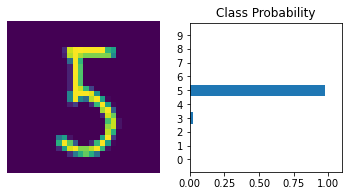

In [13]:
images, labels = next(iter(trainloader))
inputs = images.view(images.shape[0], -1)
img = inputs[0].view(1, 784)
test(img)

3
torch.Size([3, 76, 67])


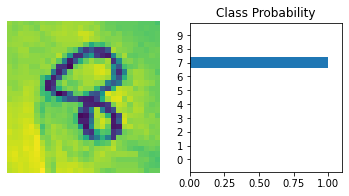

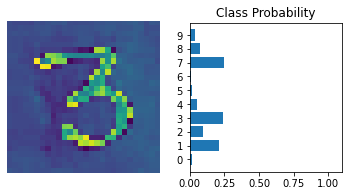

In [14]:
from PIL import Image
char = Image.open('TestChars/8/888.png')
#convert rgb to grayscale
char = char.convert('L')
char = char.resize((28,28))
char = np.array(char)
img = torch.from_numpy(char).float()
img = img.view(1, 784)
test(img)


transformN = transforms.Compose([transforms.ToPILImage(),
                                transforms.Grayscale(),
                                transforms.Resize(784),
                                transforms.ToTensor()
                              ])

charDataset = datasets.ImageFolder('TestChars', transform = transform)
charDatasetLoader = torch.utils.data.DataLoader(charDataset, shuffle = True)
#image, label = next(iter(charDatasetLoader))
image, label = charDataset[10]
#image = image.view(image.shape[0], -1)
print(label)
print(image.shape)
image = transforms.ToPILImage()(image)
image = transforms.Grayscale()(image)
image = image.resize((28,28))
image = transforms.ToTensor()(image)
image = image.view(1, 784)
test(image)